In [39]:
from PIL import Image
import torchvision.transforms 
import matplotlib.pyplot as plt


In [129]:
from glob import glob

In [130]:
def load_images(folder_path):
    image_paths = glob(f"{folder_path}/*.jpg")  # Adjust for your image format (e.g., *.png)
    images = []
    for path in image_paths:
        image = Image.open(path)
        images.append(image)
    return images

In [131]:
path='../images'
images=load_images(path)
print(len(images))

9


In [135]:
for image in images:
    image=transform(image)

In [134]:
transform =torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ToTensor()
])

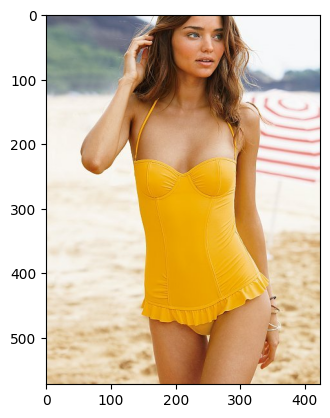

In [136]:
for image in images:
    plt.imshow(image)

In [82]:
patch_size=32
stride=patch_size

In [127]:
def extract_patches(image, patch_size, stride):
  batch_size, channels, height, width = image.size()
  num_patches_h = (height - patch_size) // stride + 1
  num_patches_w = (width - patch_size) // stride + 1
  patches = image_tensor.unfold(2, patch_size, stride).unfold(3, patch_size, stride)
  patches = patches.contiguous().view(batch_size, channels, num_patches_h, num_patches_w, patch_size, patch_size)
  print(len(patches))
  return patches


In [128]:
patches=extract_patches(image_tensor,patch_size,stride)

1


torch.Size([3, 32, 32])


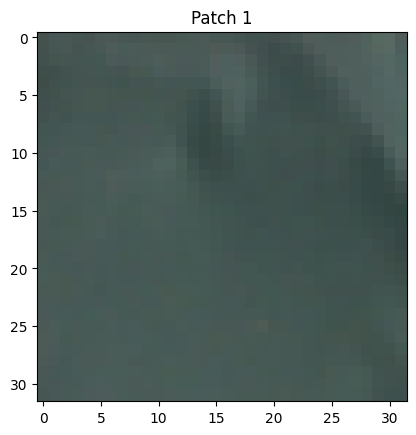

In [121]:

# Assuming you have extracted patches into a tensor named 'patches'
for i in range(len(patches)):
  patch = patches[i].cpu()  # Move to CPU memory if on GPU
  patch = patch.view(3, 7 * 7, 32, 32)
  patch=patch[:,0,:,:]

  plt.imshow(patch.permute( 1,2,0))

  plt.title(f"Patch {i+1}")
  plt.show()
